In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
"""
Loading the dataset
"""
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# The classes in the dataset
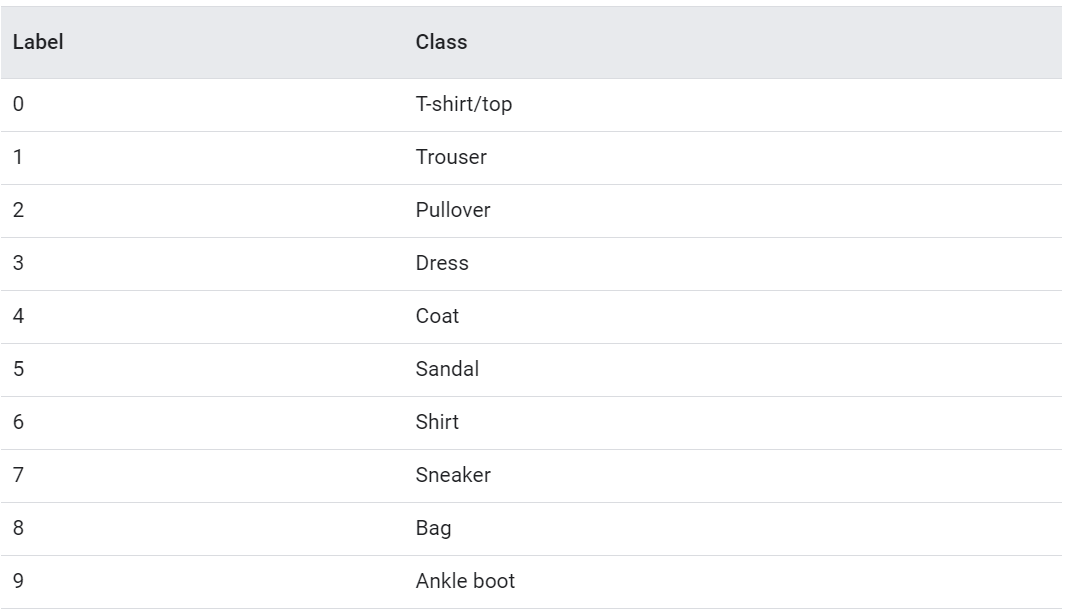

In [3]:
"""
Save the class names
"""
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
"""
Figure out the format of the training set, how many samples, the size and dimensions of the sample. In our case (number of samples, x and y axis)
"""
train_images.shape

(60000, 28, 28)

In [5]:
"""
Verify the labels matches the number of images and the structure of the labels

"""
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
"""
Figure out the format of the test set, how many samples, the size and dimensions of the sample. In our case (number of samples, x and y axis)
"""
test_images.shape

(10000, 28, 28)

In [8]:
"""
Check there are an equal number of labels
"""
len(test_labels)

10000

# Data Preprocessing
---
### What is it?

A set of steps taken to modify the structure of raw data in such a way that it can be used to train some machine learning algorithm.
It is also used to achieve performance improvements with some machine learning algorithms, as their performance often varies with how the data is represented.

---
### Types
* ***Normalize*** is used to map the features into the range 0 to 1, useful with algorithms that tend to place weights on features, if you have different features with different numeric scales, it can take longer for a model to fit. Conversely, normalizing makes covergence happen in fewer steps (usually).
* ***Standardize*** is to normalize, except you rescale the distribution of values so that the mean becomes 0 with standard deviation 1.
* ***Make class labels numeric*** making class labels numeric makes them easier to vectorize and use in training calculations, a necessary step for discrete features.

#### Let's inspect our data to see if we need any of this


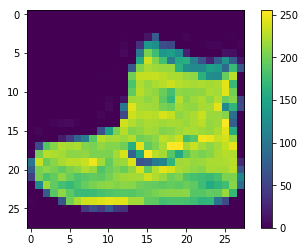

In [9]:
"""
Plot the first image, with the gradient showing pixel values
"""
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### Seems we have pixel values between 0-255. We should normalize this to 0-1.
#### Our data is very nice, what are some other steps that we may have needed to do if our data and image sources were less structured?


In [10]:
"""
In this case we apply normalization to these pixel values. Python is nice, it will apply the operation on individual elements in our array
"""
train_images = train_images / 255.0

test_images = test_images / 255.0

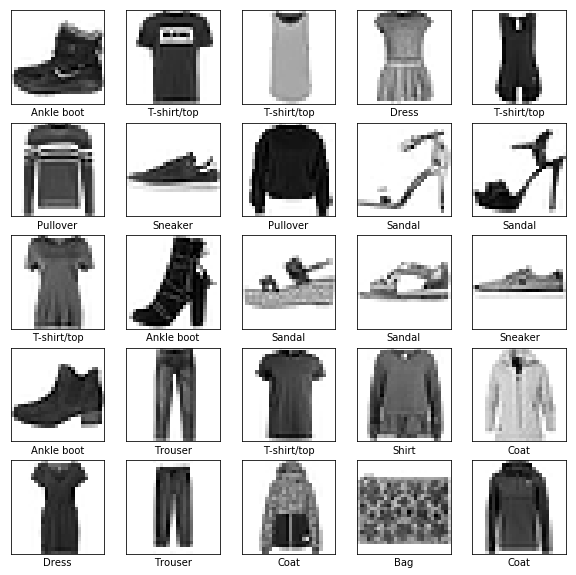

In [11]:
"""
Sanity check that we didn't break the format of the data and only rescaled the values
"""
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model Training
---
### What is a model?
##### A model is a set of mappings from some input features to some outputs. In machine learning, there are many types of models. Some examples include:
    1. Logistic and linear regression. They map features to an output, the first to a class, the second to a value.
    2. Decision Trees. Constructs trees that are traversed to find a class.
    3. Support Vector Machines (SVM), a discriminant classifier. Given n features, it will find the hyperplane that splits data points in   an n-dimensional space.
    4. Naive Bayes. Simple probabilistic classifier that assumes strong independence between features. For some reason, works really well in certain classification tasks even considering its simplicity.
    5. k-Nearest Neighbour (kNN) algorithm. Takes in the k closest points to a data point, and maps the class of the point to the most common class near it. In regression, the mean of the outputs of each class is used.
    6. k-means. Given k clusters, assigns data points into a cluster based on how close it is to the mean of the cluster. Used in both supervised and unsupervised learning.
    
    There are many more, you can read further here: https://towardsdatascience.com/types-of-machine-learning-algorithms-you-should-know-953a08248861

#### We will focus this workshop on the Neural Network.
---
* Neural networks are a set of models loosely inspired by the structure of neurons in our brains. For example, neural networks have nodes that behave like individual neurons. They have a vector of input that is passed through some activation function to produce an output. 

### Single neuron node
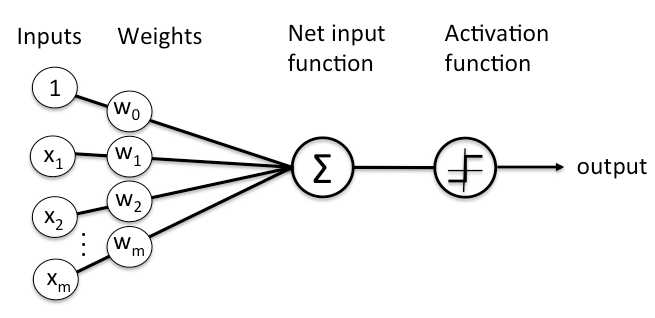

### Basic neural network
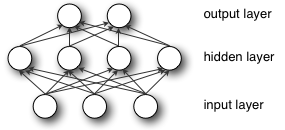

### We are going to use keras to construct a basic neural network model

In [12]:
"""
Basic model with input (individual image), 
a dense hidden layer (meaning all of the input nodes connect to each of the nodes in this layer), 
and output (10 outputs corresponding to each of our classes)
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
"""
We need to compile the model before it is ready for use.
We need the optimizer: algorithm that determines how the weights of each layer are updated,
loss function: calculates how well the model performs. This is what we usually want to minimize.
"""
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


##### You can read about the adam optimizer here: https://arxiv.org/abs/1412.6980
---
##### Sparse categorical crossentopy:
Used when you know that your output classes are mutually exclusive (any input belongs strictly to one class). If you want a probability of multiple classes, use categorical crossentropy.
Formula for categorical crossentropy (S - samples, C - classes, s∈c - sample belongs to class c) is:
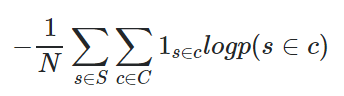


---
##### Accuracy
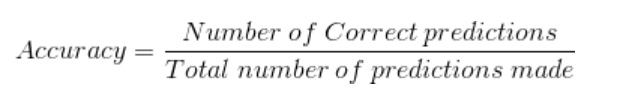
You can see other types of metrics here: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

### Training Time
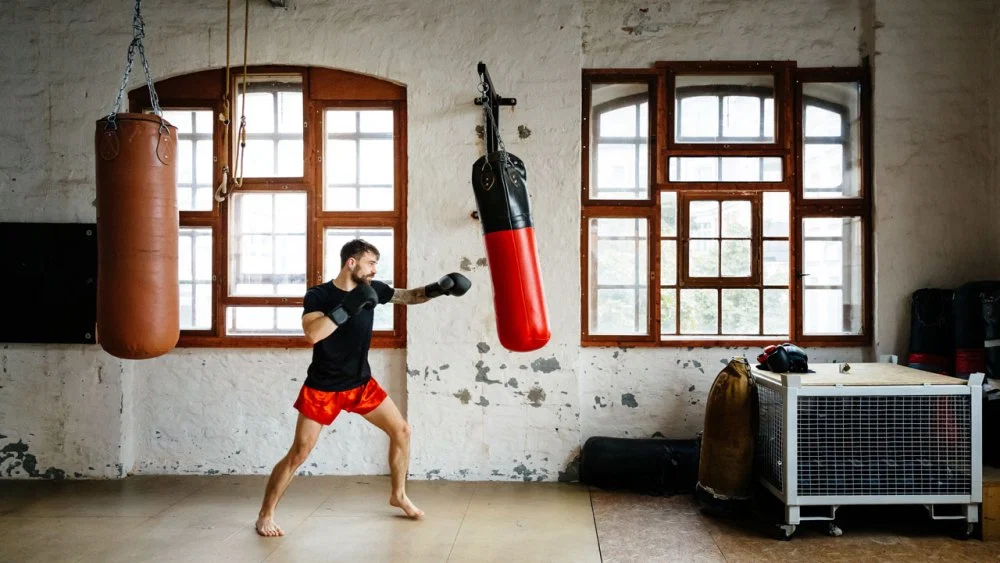
To train, we need to feed our model the ***training data*** and the ***training labels***
Training is run for a certain number of ***epochs*** with each epoch ending when all the training samples are used once.

In [14]:
"""
Train with 10 epochs
"""
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 37s 619us/sample - loss: 0.4930 - acc: 0.8256
Epoch 2/10
60000/60000 [==============================] - 40s 670us/sample - loss: 0.3718 - acc: 0.8656
Epoch 3/10
60000/60000 [==============================] - 37s 618us/sample - loss: 0.3353 - acc: 0.8774
Epoch 4/10
60000/60000 [==============================] - 41s 687us/sample - loss: 0.3125 - acc: 0.8856
Epoch 5/10
60000/60000 [==============================] - 39s 657us/sample - loss: 0.2950 - acc: 0.8921
Epoch 6/10
60000/60000 [==============================] - 35s 588us/sample - loss: 0.2787 - acc: 0.8968
Epoch 7/10
60000/60000 [==============================] - 44s 738us/sample - loss: 0.2668 - acc: 0.8996
Epoch 8/10
60000/60000 [==============================] - 36s 606us/sample - loss: 0.2552 - acc: 0.9051
Epoch 9/10
60000/60000 [==============================] - 37s 619us/sample - loss: 0.2457 - acc: 0.9087
Epoch 10/10
60000/60000 [==============================] - 38s 6

In [15]:
"""
Check the quality of the model with the test set
"""
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

 - 5s - loss: 0.3657 - acc: 0.8717

Test accuracy: 0.8717


### Check with your own predictions
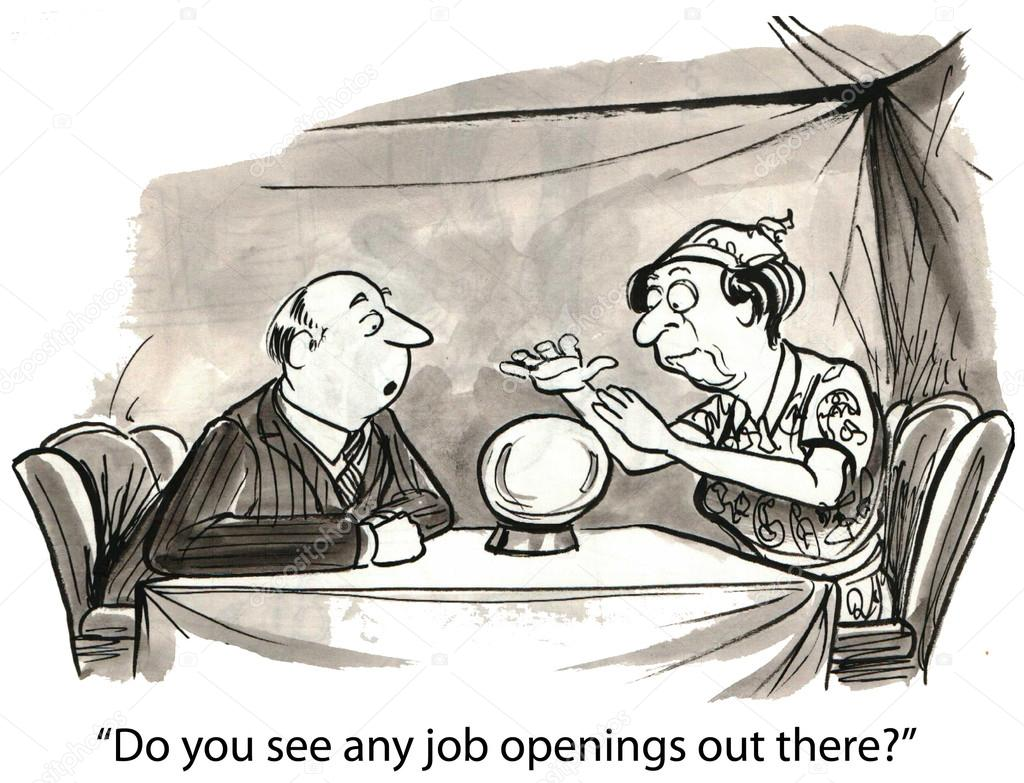


In [16]:
"""
View predictions on test images
"""
predictions = model.predict(test_images)


In [17]:
"""
Check confidence score of any class in each prediction
"""
predictions[0]

array([3.4169732e-06, 3.6210213e-07, 1.8908219e-06, 1.6321422e-09,
       2.3612036e-07, 2.0281565e-03, 1.5702719e-05, 1.1689886e-01,
       6.5496702e-06, 8.8104486e-01], dtype=float32)

In [18]:
"""
Shows the predicted class
"""
np.argmax(predictions[0])

9

In [19]:
"""
Compare with test label
"""
test_labels[0]

9

In [20]:
"""
Image plotting
"""
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

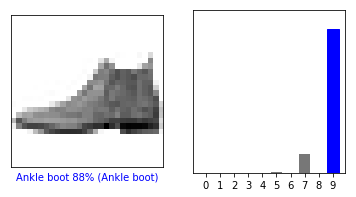

In [21]:
"""
Show image prediction with image
"""
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

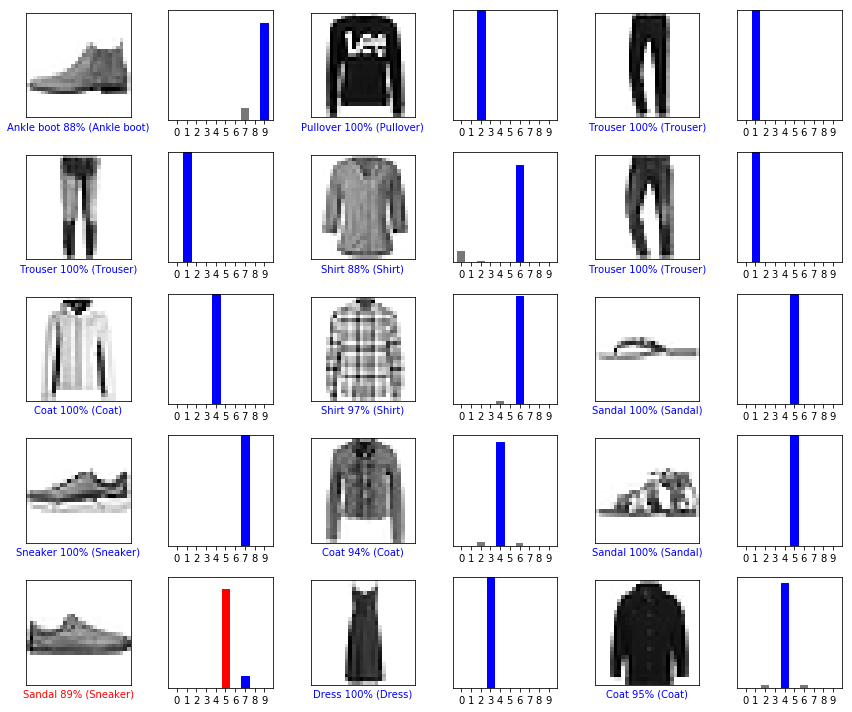

In [22]:
"""
Plot the first X test images, their predicted labels, and the true labels.
Color correct predictions in blue and incorrect predictions in red.
"""
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [23]:
"""
Make a prediction
"""
img = test_images[1]

print(img.shape)

(28, 28)


In [24]:
"""
Add the image to a batch where it's the only member.
"""
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.7476547e-06 9.4114011e-16 9.9576890e-01 8.5978219e-10 2.0866441e-03
  1.8285238e-13 2.1417735e-03 4.8367227e-10 1.9327075e-12 4.0486138e-15]]


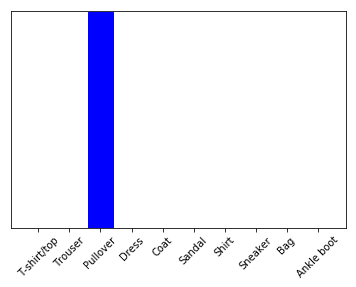

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

2

### Let's try a much better model now
##### We are going to copy a VGG-16 model but make it a bit smaller (the original is ovekill).
##### The general structure is as follows
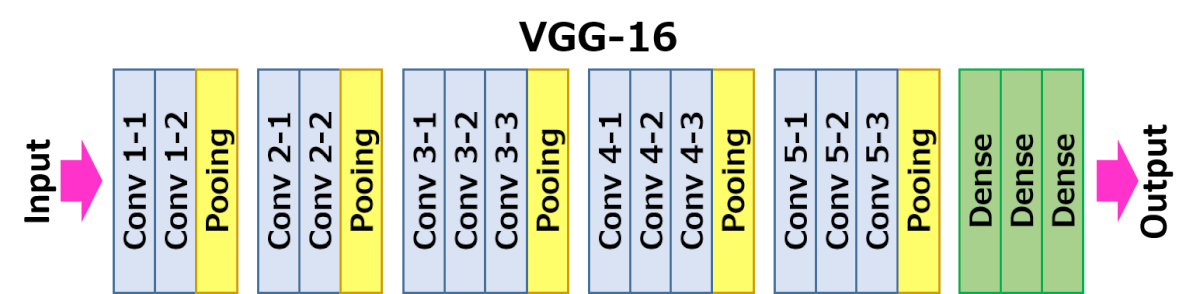

#### What is convolution?
Essentially it's a filtering over some nodes. This extracts hidden features for the network to use.
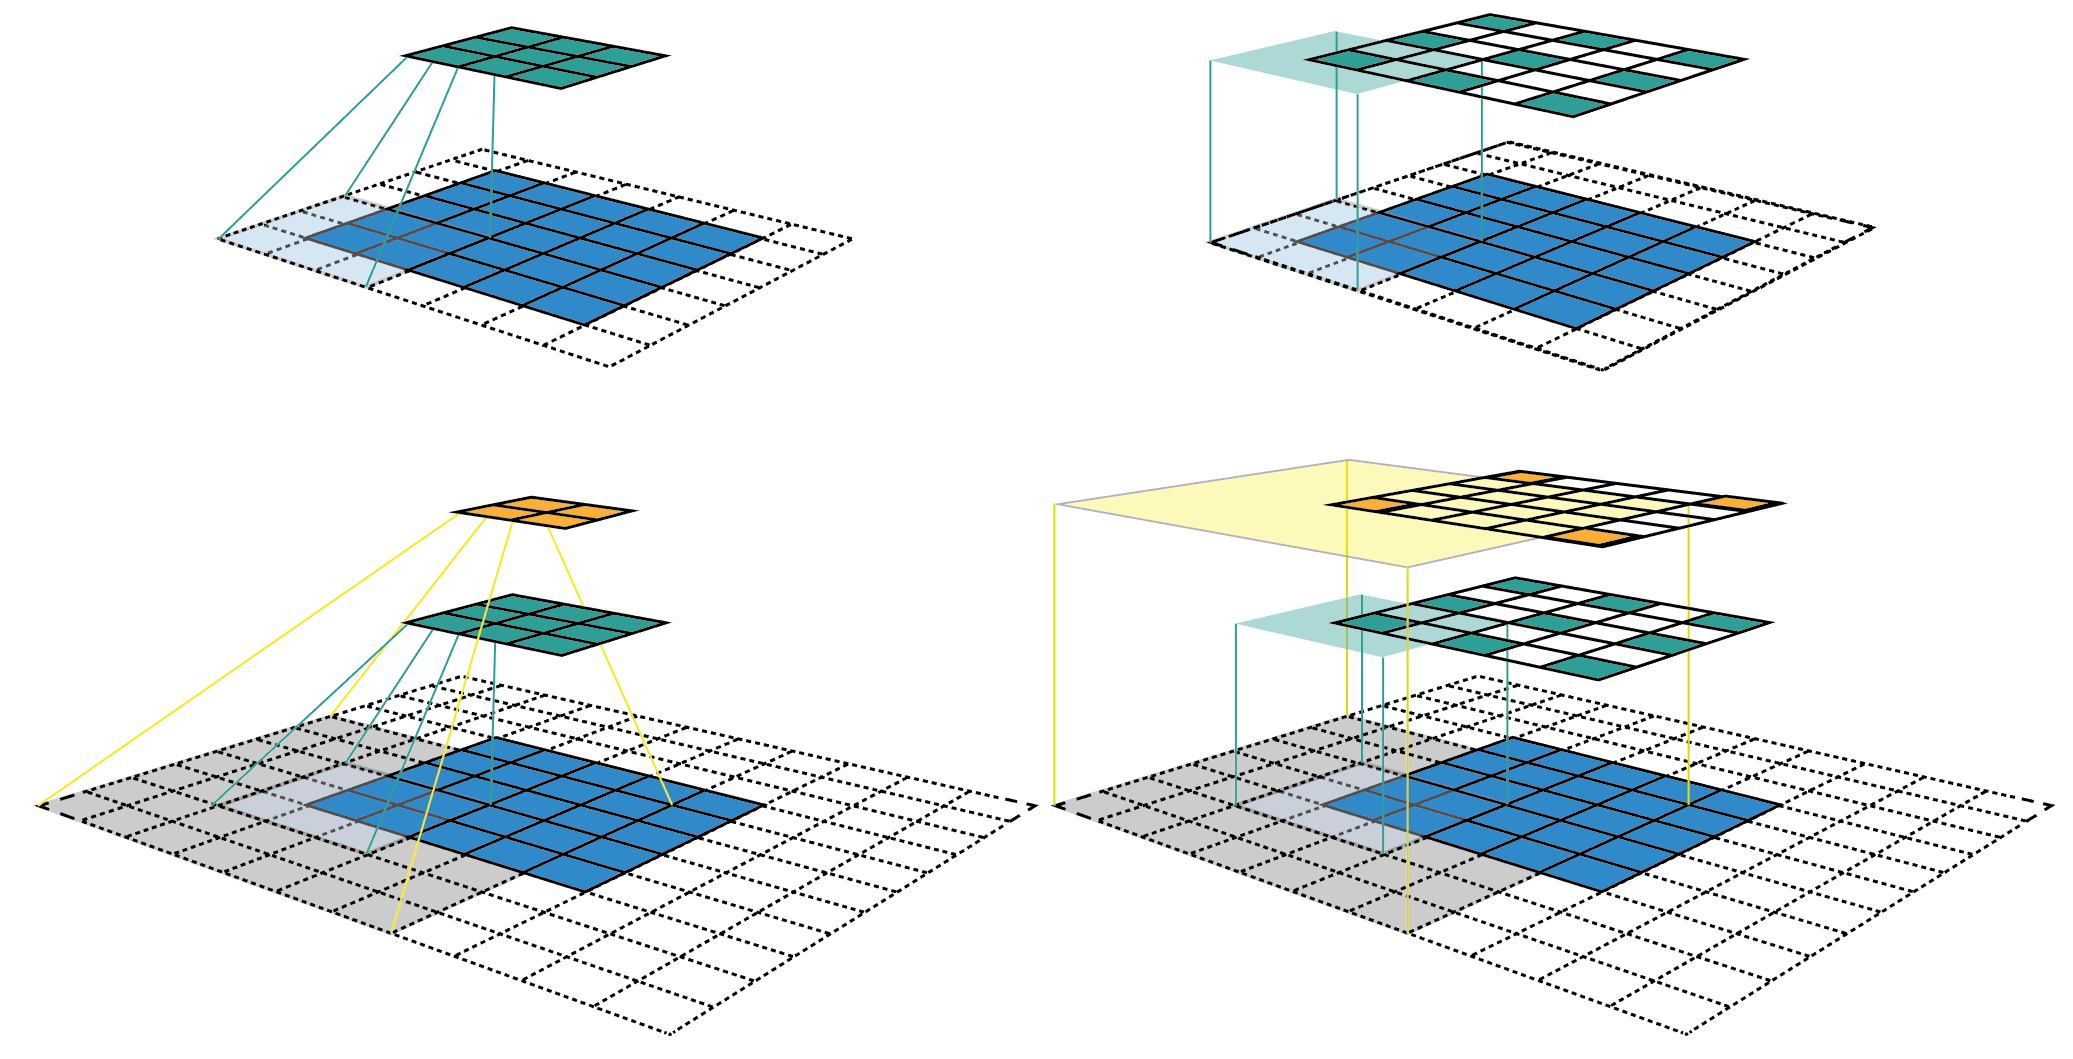

In [28]:
"""
Convolutional Neural Network with input (individual image), 
and output (10 outputs corresponding to each of our classes). Structure adapted from VGG16.
"""
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

class MiniVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
 
        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            # first CONV => RELU => CONV => RELU => POOL layer set
        model.add(Conv2D(32, (3, 3), padding="same",
            input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
 
        # second CONV => RELU => CONV => RELU => POOL layer set
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
 
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
 
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
 
        # return the constructed network architecture
        return model

Using TensorFlow backend.


In [29]:
from keras.optimizers import SGD
initial_learning_rate = 1e-2
epochs=16 # use something like 25 for best results
opt = SGD(lr=initial_learning_rate, momentum=0.9, decay=initial_learning_rate / epochs)
deepModel = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)
deepModel.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [31]:
"""
 if we are using "channels first" ordering, then reshape the design
 matrix such that the matrix is:
 num_samples x depth x rows x columns
"""
from keras.utils import np_utils
trainX = train_images.reshape((train_images.shape[0], 1, 28, 28))
testX = test_images.reshape((test_images.shape[0], 1, 28, 28))
if K.image_data_format() == "channels_first":
    trainX = train_images.reshape((train_images.shape[0], 1, 28, 28))
    testX = test_images.reshape((test_images.shape[0], 1, 28, 28))
 
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    trainX = train_images.reshape((train_images.shape[0], 28, 28, 1))
    testX = test_images.reshape((test_images.shape[0], 28, 28, 1))

# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(train_labels, 10)
testY = np_utils.to_categorical(test_labels, 10)


In [ ]:
deepModel.fit(trainX, trainY,
    validation_data=(testX, testY),
    batch_size=32, epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 1753s 29ms/step - loss: 0.5329 - acc: 0.8211 - val_loss: 0.3599 - val_acc: 0.8719
Epoch 2/16
60000/60000 [==============================] - 1683s 28ms/step - loss: 0.3378 - acc: 0.8793 - val_loss: 0.2704 - val_acc: 0.9007
Epoch 3/16
60000/60000 [==============================] - 1621s 27ms/step - loss: 0.2943 - acc: 0.8939 - val_loss: 0.2524 - val_acc: 0.9070
Epoch 4/16
60000/60000 [==============================] - 1650s 28ms/step - loss: 0.2720 - acc: 0.9012 - val_loss: 0.2476 - val_acc: 0.9069
Epoch 5/16
60000/60000 [==============================] - 1596s 27ms/step - loss: 0.2582 - acc: 0.9063 - val_loss: 0.2426 - val_acc: 0.9107
Epoch 6/16
60000/60000 [==============================] - 1603s 27ms/step - loss: 0.2493 - acc: 0.9096 - val_loss: 0.2364 - val_acc: 0.9139
Epoch 7/16
60000/60000 [==============================] - 1625

In [ ]:
from sklearn.metrics import classification_report
# make predictions on the test set
preds = deepModel.predict(testX)

print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
    target_names=labelNames))
 
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [ ]:
from imutils import build_montages
# initialize our list of output images
images = []
 
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(testY)), size=(16,)):
    # classify the clothing
    probs = model.predict(testX[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    label = labelNames[prediction[0]]
 
    # extract the image from the testData if using "channels_first"
    # ordering
    if K.image_data_format() == "channels_first":
        image = (testX[i][0] * 255).astype("uint8")
 
    # otherwise we are using "channels_last" ordering
    else:
        image = (testX[i] * 255).astype("uint8")
    # initialize the text label color as green (correct)
    color = (0, 255, 0)
 
    # otherwise, the class label prediction is incorrect
    if prediction[0] != np.argmax(testY[i]):
        color = (0, 0, 255)
 
    # merge the channels into one image and resize the image from
    # 28x28 to 96x96 so we can better see it and then draw the
    # predicted label on the image
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
        color, 2)
 
    # add the image to our list of output images
    images.append(image)
 
# construct the montage for the images
montage = build_montages(images, (96, 96), (4, 4))[0]
 
# show the output montage
cv2.imshow("Fashion MNIST", montage)
cv2.waitKey(0)

#### References

1. https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/
2. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
3. https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
4. https://www.tensorflow.org/tutorials/keras/classification
5. https://neurohive.io/en/popular-networks/vgg16/